In [1]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [3]:
config = {
    'BATCH_SIZE':32,
    'IMAGE_SIZE': (240, 240),
    'SEED':42,
    'LEARNING_RATE':0.003,
    'EPOCHS':15
}

In [4]:
data_dir = '/content/drive/MyDrive/Doing_lab/food-data'

train_image_gen = ImageDataGenerator(validation_split=0.2)
validation_image_gen = ImageDataGenerator(validation_split=0.2)

train_generator = train_image_gen.flow_from_directory(
    data_dir,
    shuffle=True,
    seed=config['SEED'],
    target_size=config['IMAGE_SIZE'],
    batch_size=config['BATCH_SIZE'],
    class_mode='sparse',
    subset='training')

validation_generator = validation_image_gen.flow_from_directory(
    data_dir, 
    shuffle=False,
    seed=config['SEED'],
    target_size=config['IMAGE_SIZE'],
    batch_size=config['BATCH_SIZE'],
    class_mode='sparse',
    subset='validation')

Found 4000 images belonging to 50 classes.
Found 1000 images belonging to 50 classes.


In [5]:
from tensorflow.keras.applications import EfficientNetB1

# 클래스 개수
num_classes = train_generator.num_classes

# 모델 생성 함수
# 사전학습 모델을 불러와 마지막 레이어를 제외하고 전부 frozen

def create_model(input_shape, num_classes):
  base_model = EfficientNetB1(include_top=False, weights='imagenet')
  base_model.trainable = False
  
  inputs = Input(shape=input_shape)
  x = base_model(inputs, training=False)

  x = GlobalAveragePooling2D()(x)
  outputs = Dense(num_classes, activation='softmax')(x)

  model = Model(inputs, outputs)
  opt = Adam(learning_rate=config['LEARNING_RATE'])

  model.compile(
      optimizer=opt,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model = create_model(config['IMAGE_SIZE'] + (3,), num_classes)
model.summary()

27025408/27018416 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
efficientnetb1 (Functional)  (None, None, None, 1280)  6575239   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                64050     
Total params: 6,639,289
Trainable params: 64,050
Non-trainable params: 6,575,239
_________________________________________________________________


In [6]:
checkpoint_path = '/content/drive/MyDrive/Doing_lab/checkpoint/CASE1_EfficientNetB1.h5'

mc = ModelCheckpoint(filepath=checkpoint_path,
                     save_weight_only=True,
                     save_best_only=True,
                     monitor='val_loss',
                     verbose=1)

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   verbose=1)

hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 epochs=config['EPOCHS'],
                 callbacks=[mc, es])

Epoch 1/15
125/125 [==============================] - 1128s 9s/step - loss: 2.6503 - accuracy: 0.3581 - val_loss: 1.3413 - val_accuracy: 0.6350

Epoch 00001: val_loss improved from inf to 1.34134, saving model to /content/drive/MyDrive/Doing_lab/checkpoint/CASE1_EfficientNetB1.h5
Epoch 2/15
125/125 [==============================] - 29s 229ms/step - loss: 0.8988 - accuracy: 0.7758 - val_loss: 1.2294 - val_accuracy: 0.6590

Epoch 00002: val_loss improved from 1.34134 to 1.22937, saving model to /content/drive/MyDrive/Doing_lab/checkpoint/CASE1_EfficientNetB1.h5
Epoch 3/15
125/125 [==============================] - 29s 229ms/step - loss: 0.5683 - accuracy: 0.8705 - val_loss: 1.2224 - val_accuracy: 0.6660

Epoch 00003: val_loss improved from 1.22937 to 1.22236, saving model to /content/drive/MyDrive/Doing_lab/checkpoint/CASE1_EfficientNetB1.h5
Epoch 4/15
125/125 [==============================] - 29s 228ms/step - loss: 0.3600 - accuracy: 0.9419 - val_loss: 1.2143 - val_accuracy: 0.6740

E

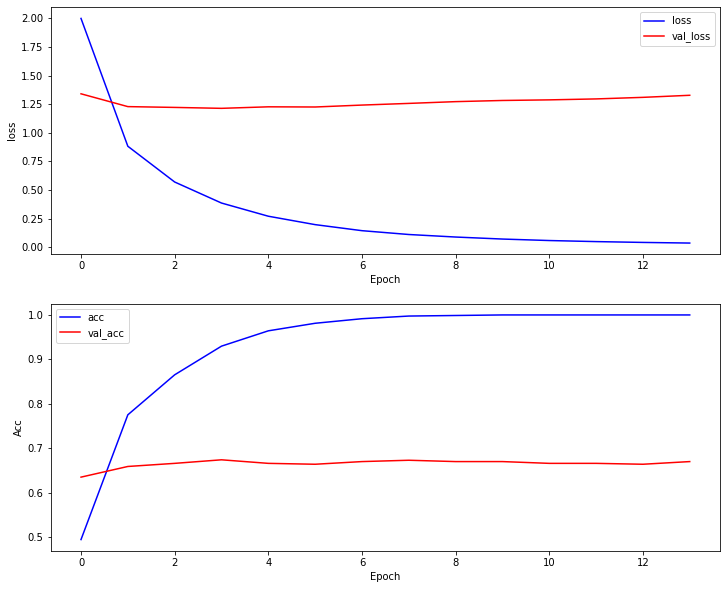

In [7]:
# 그래프
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# loss, val_loss
ax[0].set_ylabel("loss")
ax[0].set_xlabel("Epoch")
ax[0].plot(hist.history['loss'], 'b-', label = 'loss')
ax[0].plot(hist.history['val_loss'], 'r-', label = 'val_loss')
ax[0].legend()

# acc, val_acc
ax[1].set_ylabel("Acc")
ax[1].set_xlabel("Epoch")
ax[1].plot(hist.history['accuracy'], 'b-', label = 'acc')
ax[1].plot(hist.history['val_accuracy'], 'r-', label = 'val_acc')
ax[1].legend()

plt.show()

In [8]:
data_dir = '/content/drive/MyDrive/Doing_lab/food-data'

# apply augmentation 
train_image_gen = ImageDataGenerator(validation_split=0.2,
                               rotation_range=20,
                               width_shift_range=0.2,
                               height_shift_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')
                            
validation_image_gen = ImageDataGenerator(validation_split=0.2)

train_generator = train_image_gen.flow_from_directory(
    data_dir,
    shuffle=True,
    seed=config['SEED'],
    target_size=config['IMAGE_SIZE'],
    batch_size=config['BATCH_SIZE'],
    class_mode='sparse',
    subset='training')

validation_generator = validation_image_gen.flow_from_directory(
    data_dir, 
    shuffle=False,
    seed=config['SEED'],
    target_size=config['IMAGE_SIZE'],
    batch_size=config['BATCH_SIZE'],
    class_mode='sparse',
    subset='validation')

Found 4000 images belonging to 50 classes.
Found 1000 images belonging to 50 classes.


In [9]:
from tensorflow.keras.applications import EfficientNetB1

# 클래스 개수
num_classes = train_generator.num_classes

# 모델 생성 함수
# 사전학습 모델을 불러와 마지막 레이어를 제외하고 전부 frozen

def create_model(input_shape, num_classes):
  base_model = EfficientNetB1(include_top=False, weights='imagenet')
  base_model.trainable = False
  
  inputs = Input(shape=input_shape)
  x = base_model(inputs, training=False)

  x = GlobalAveragePooling2D()(x)
  outputs = Dense(num_classes, activation='softmax')(x)

  model = Model(inputs, outputs)
  opt = Adam(learning_rate=config['LEARNING_RATE'])

  model.compile(
      optimizer=opt,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy']
  )
  return model

model = create_model(config['IMAGE_SIZE'] + (3,), num_classes)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 240, 240, 3)]     0         
_________________________________________________________________
efficientnetb1 (Functional)  (None, None, None, 1280)  6575239   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                64050     
Total params: 6,639,289
Trainable params: 64,050
Non-trainable params: 6,575,239
_________________________________________________________________


In [10]:
checkpoint_path = '/content/drive/MyDrive/Doing_lab/checkpoint/CASE2_EfficientNetB1.h5'

mc = ModelCheckpoint(filepath=checkpoint_path,
                     save_weight_only=True,
                     save_best_only=True,
                     monitor='val_loss',
                     verbose=1)

es = EarlyStopping(monitor='val_loss',
                   patience=10,
                   verbose=1)

hist = model.fit(train_generator,
                 validation_data=validation_generator,
                 epochs=config['EPOCHS'],
                 callbacks=[mc, es])

Epoch 1/15
125/125 [==============================] - 76s 561ms/step - loss: 2.9658 - accuracy: 0.2738 - val_loss: 1.5072 - val_accuracy: 0.5890

Epoch 00001: val_loss improved from inf to 1.50721, saving model to /content/drive/MyDrive/Doing_lab/checkpoint/CASE2_EfficientNetB1.h5
Epoch 2/15
125/125 [==============================] - 68s 546ms/step - loss: 1.3892 - accuracy: 0.6230 - val_loss: 1.3273 - val_accuracy: 0.6170

Epoch 00002: val_loss improved from 1.50721 to 1.32730, saving model to /content/drive/MyDrive/Doing_lab/checkpoint/CASE2_EfficientNetB1.h5
Epoch 3/15
125/125 [==============================] - 68s 543ms/step - loss: 1.0654 - accuracy: 0.6995 - val_loss: 1.2888 - val_accuracy: 0.6450

Epoch 00003: val_loss improved from 1.32730 to 1.28884, saving model to /content/drive/MyDrive/Doing_lab/checkpoint/CASE2_EfficientNetB1.h5
Epoch 4/15
125/125 [==============================] - 68s 543ms/step - loss: 0.8872 - accuracy: 0.7576 - val_loss: 1.2585 - val_accuracy: 0.6540



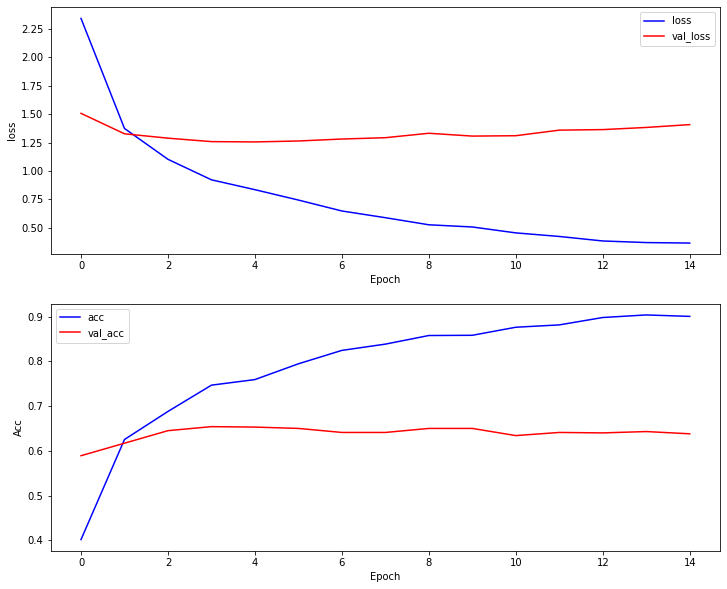

In [11]:
# 그래프
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# loss, val_loss
ax[0].set_ylabel("loss")
ax[0].set_xlabel("Epoch")
ax[0].plot(hist.history['loss'], 'b-', label = 'loss')
ax[0].plot(hist.history['val_loss'], 'r-', label = 'val_loss')
ax[0].legend()

# acc, val_acc
ax[1].set_ylabel("Acc")
ax[1].set_xlabel("Epoch")
ax[1].plot(hist.history['accuracy'], 'b-', label = 'acc')
ax[1].plot(hist.history['val_accuracy'], 'r-', label = 'val_acc')
ax[1].legend()

plt.show()

In [15]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

validation_generator.reset()

# 예측값 
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=-1)

# 실제값
class_names = [key for key, value in train_generator.class_indices.items()]
y_real = validation_generator.classes[validation_generator.index_array]

# # confusion matrix
cm = confusion_matrix(y_real, y_pred)

# accuracy_score, recall_score, precision_score
print(classification_report(y_real, y_pred, target_names=class_names))

print("Acc :", accuracy_score(y_real, y_pred))
print("Recall :", recall_score(y_real, y_pred, average='macro'))
print("Precision :", precision_score(y_real, y_pred, average='macro'))

                         precision    recall  f1-score   support

              apple_pie       0.33      0.45      0.38        20
         baby_back_ribs       0.83      0.50      0.62        20
                baklava       0.71      0.50      0.59        20
         beef_carpaccio       0.47      0.40      0.43        20
           beef_tartare       0.69      0.45      0.55        20
             beet_salad       0.60      0.30      0.40        20
               beignets       0.71      0.60      0.65        20
               bibimbap       0.81      0.85      0.83        20
          bread_pudding       0.16      0.25      0.19        20
      breakfast_burrito       0.75      0.90      0.82        20
             bruschetta       0.42      0.55      0.48        20
           caesar_salad       0.77      0.85      0.81        20
                cannoli       0.91      0.50      0.65        20
          caprese_salad       0.69      0.45      0.55        20
            carrot_cake 

In [16]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 9  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 3  0 10 ...  0  0  0]
 ...
 [ 1  0  0 ... 16  0  0]
 [ 0  0  0 ...  0 15  0]
 [ 0  0  0 ...  0  0  9]]


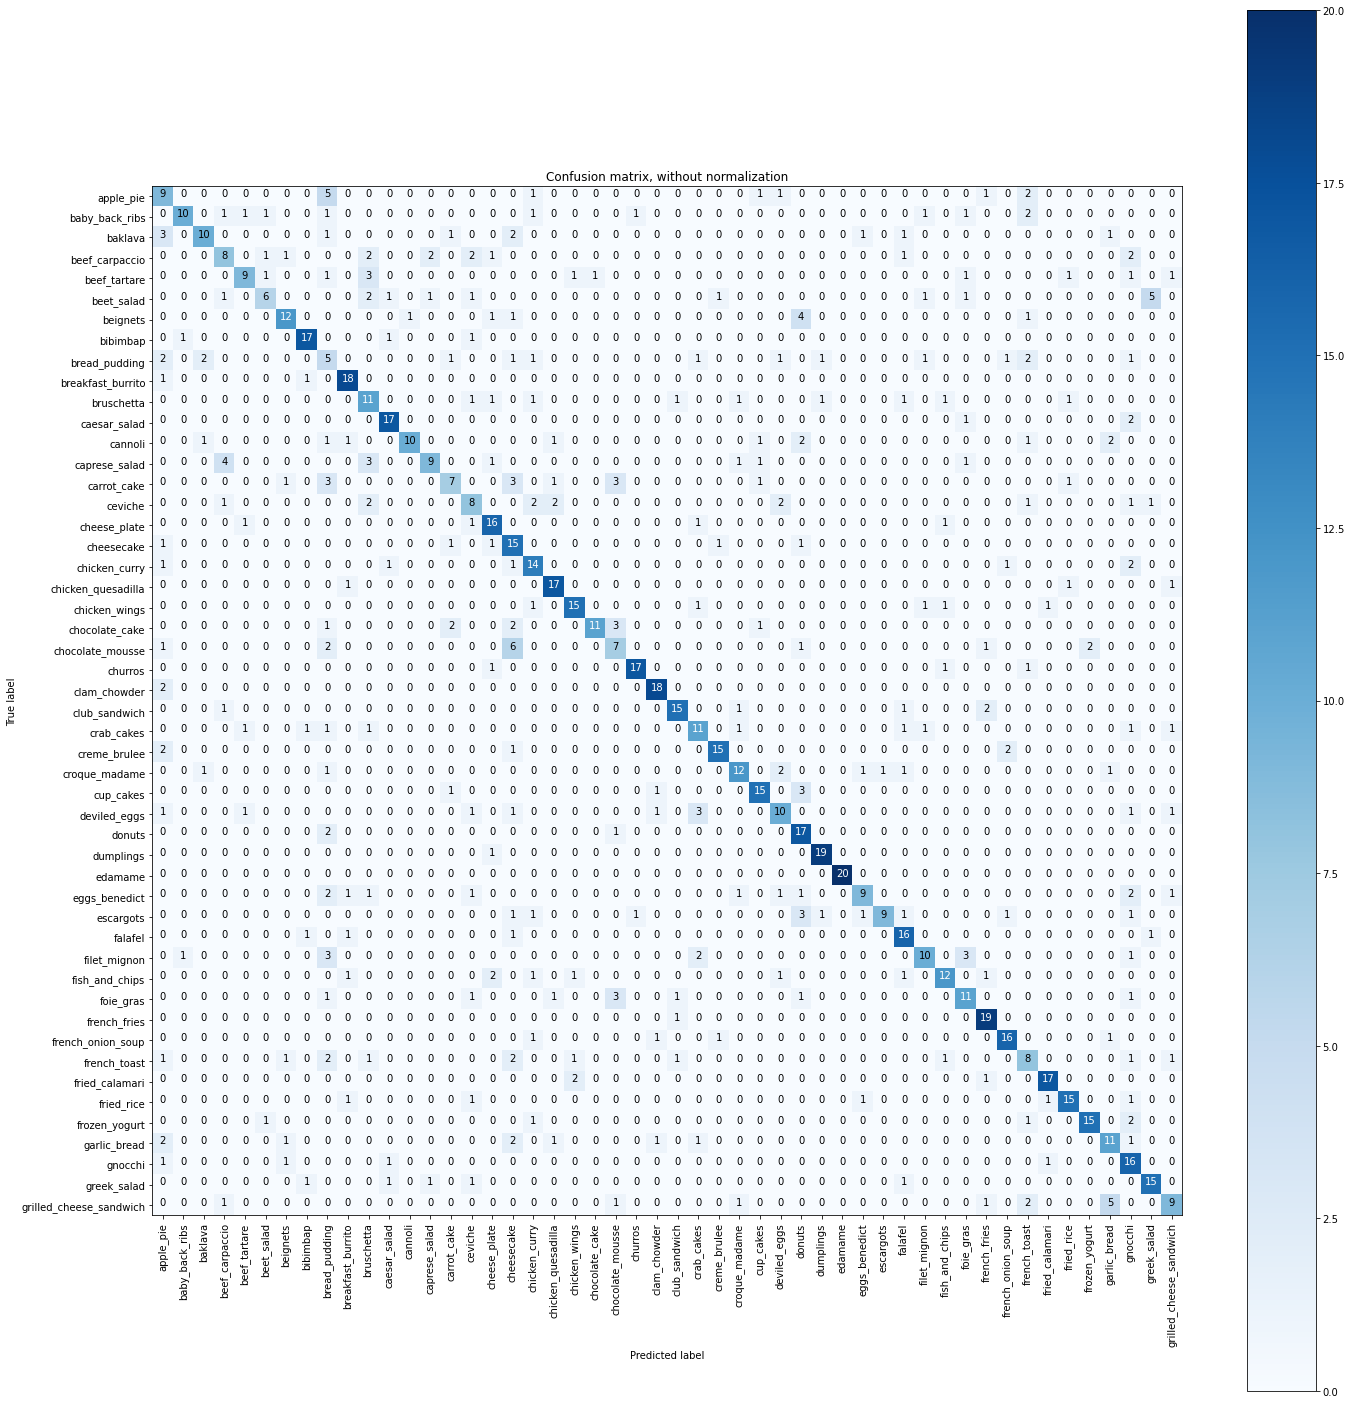

In [17]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix, without normalization')